<h1> Public Transit Query

**By:** Andrew Williams 

**Partner:** Ben Brassette
    
**Description:** Further needed research on public transit neighborhoods. Primary objective is to query and locate high use census tracts for comparison to other variables. I will be tackling numbers 5, 6, and 7 in this noteboob.

**Notes for self to advance project:**
1. Biggest step forward, intergrating our notebooks in the remaining few weeks in a targeted fashion
2.  Overlay heavy rail and light rail stops
3.  Provide more accurate description of the areas through a spatial join
4. Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
5. Query "high" transit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
6. Availability of cars in households
7. Bring a shaprer focus to Central LA and the San Fernando Valley

**After completing this notebook query, I have a serious of decisions I need to make**
1. How many tracts should we include? Cut off at 20% for for all public transit?
2. Look at variety of forms of public transit around high concentration areas?
3. Focal point on just Central LA and SF Valley?
4. Need to define rail systems in LA

# Library Import 


Importing various libaries

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

Libraries good to go. 

# Mode of Travel

Import data and run quick analysis of data.

In [2]:
#transporation means to work
means2work = gpd.read_file('Data/Means_Transpo_Work_Tract/acs2019_5yr_B08301_14000US06037185320.geojson')

In [3]:
type(means2work)

geopandas.geodataframe.GeoDataFrame

In [4]:
list(means2work)

['geoid',
 'name',
 'B08301001',
 'B08301001, Error',
 'B08301002',
 'B08301002, Error',
 'B08301003',
 'B08301003, Error',
 'B08301004',
 'B08301004, Error',
 'B08301005',
 'B08301005, Error',
 'B08301006',
 'B08301006, Error',
 'B08301007',
 'B08301007, Error',
 'B08301008',
 'B08301008, Error',
 'B08301009',
 'B08301009, Error',
 'B08301010',
 'B08301010, Error',
 'B08301011',
 'B08301011, Error',
 'B08301012',
 'B08301012, Error',
 'B08301013',
 'B08301013, Error',
 'B08301014',
 'B08301014, Error',
 'B08301015',
 'B08301015, Error',
 'B08301016',
 'B08301016, Error',
 'B08301017',
 'B08301017, Error',
 'B08301018',
 'B08301018, Error',
 'B08301019',
 'B08301019, Error',
 'B08301020',
 'B08301020, Error',
 'B08301021',
 'B08301021, Error',
 'geometry']

In [5]:
means2work.shape

(1005, 45)

In [6]:
means2work.head(4)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,10.0,16.0,0.0,12.0,77.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,74.0,65.0,72.0,63.0,129.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,30.0,42.0,68.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [7]:
means2work.tail(4)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1964868.0,5629.0,1541762.0,6099.0,1368251.0,6262.0,173511.0,3251.0,...,495.0,18897.0,930.0,67341.0,1930.0,25181.0,1195.0,123270.0,2531.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Data look normal and as expexted for a gpd. I will delete the last row as it represents the combined city total.

In [8]:
#dropped la city total
means2work = means2work.drop([1004])

In [9]:
means2work.tail(3)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Last data point is dropped. 

I'm deleting my standard deviation or "error" rows and dropping the breakdown of carpooling. Will re-define my variable and test it out. 

In [10]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

In [11]:
means2work = means2work [columns_to_keep]

In [12]:
means2work.sample()

,geoid,name,B08301001,B08301002,B08301003,B08301004,B08301010,B08301011,B08301012,B08301013,B08301014,B08301016,B08301017,B08301018,B08301019,B08301020,B08301021,geometry
42,14000US06037106403,"Census Tract 1064.03, Los Angeles, CA",1566.0,1464.0,1212.0,252.0,21.0,4.0,0.0,17.0,0.0,0.0,0.0,0.0,16.0,0.0,65.0,"MULTIPOLYGON (((-118.44971 34.30759, -118.4481..."


Great, columns have been dropped, but now will relabel them appropriately. 

In [13]:
#renaming columns
means2work.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry']

In [14]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
846,14000US06037265202,"Census Tract 2652.02, Los Angeles, CA",1719.0,999.0,972.0,27.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,15.0,383.0,97.0,175.0,"MULTIPOLYGON (((-118.44822 34.06364, -118.4470..."


Fantastic, columns have been re-named as seen in the sample above.

To make appropriate comparisons, will create percenates for each category.

In [15]:
means2work['Percent Car, truck, or van'] = means2work['Car, truck, or van']/means2work['Total']*100
means2work['Percent Drove alone'] = means2work['Drove alone']/means2work['Total']*100
means2work['Percent Carpooled'] = means2work['Carpooled']/means2work['Total']*100
means2work['Percent Public transportation'] = means2work['Public transportation']/means2work['Total']*100
means2work['Percent Bus'] = means2work['Bus']/means2work['Total']*100
means2work['Percent Subway or elevated il'] = means2work['Subway or elevated il']/means2work['Total']*100
means2work['Percent Long-distance train or commuter rail'] = means2work['Long-distance train or commuter rail']/means2work['Total']*100
means2work['Percent Light rail, streetcar or trolley'] = means2work['Light rail, streetcar or trolley']/means2work['Total']*100
means2work['Percent Taxicab'] = means2work['Taxicab']/means2work['Total']*100
means2work['Percent Motorcycle'] = means2work['Motorcycle']/means2work['Total']*100
means2work['Percent Bicycle'] = means2work['Bicycle']/means2work['Total']*100
means2work['Percent Walked'] = means2work['Walked']/means2work['Total']*100
means2work['Percent Other means'] = means2work['Other means']/means2work['Total']*100
means2work['Percent Worked from home'] = means2work['Worked from home']/means2work['Total']*100

In [16]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
399,14000US06037189102,"Census Tract 1891.02, Los Angeles, CA",2343.0,1818.0,1775.0,43.0,109.0,17.0,92.0,0.0,...,0.725566,3.92659,0.0,0.0,0.0,0.512164,0.0,0.512164,0.554844,16.175843


Lovely, percent columns have been added to my dataset.

Creating a new file so I can skip the above steps next time I use this data.

Creating a file

In [17]:
means2work.to_file('means2work.geojson')

That actually worked, great. 

Redownload file

In [18]:
means2work2 = gpd.read_file('means2work.geojson')

Test File

In [19]:
means2work.sample(5)

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
318,14000US06037139303,"Census Tract 1393.03, Los Angeles, CA",2264.0,1803.0,1646.0,157.0,155.0,126.0,29.0,0.0,...,5.565371,1.280919,0.000000,0.000000,2.120141,0.000000,0.309187,1.722615,1.722615,7.641343
309,14000US06037137402,"Census Tract 1374.02, Los Angeles, CA",2372.0,2110.0,1873.0,237.0,4.0,4.0,0.0,0.0,...,0.168634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.876897
984,14000US06037297500,"Census Tract 2975, Los Angeles, CA",2276.0,1983.0,1893.0,90.0,90.0,62.0,0.0,13.0,...,2.724077,0.000000,0.571178,0.659051,0.000000,0.746924,0.000000,0.966608,0.307557,6.898067
695,14000US06037224310,"Census Tract 2243.10, Los Angeles, CA",1147.0,683.0,595.0,88.0,285.0,270.0,15.0,0.0,...,23.539669,1.307759,0.000000,0.000000,0.000000,0.000000,4.359198,8.544028,0.000000,2.702703
971,14000US06037296401,"Census Tract 2964.01, Los Angeles, CA",1440.0,1366.0,1280.0,86.0,20.0,20.0,0.0,0.0,...,1.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,2.916667


In [20]:
means2work.columns.to_list()

['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Taxicab',
 'Percent Motorcycle',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home']

Beautiful, lets repeat for neighborhood data below. 

# Query for Relative High Transit Areas

## Quick Survey of High Use Transit Areas

In [21]:
transit_indicators = ['Percent Public transportation',
'Percent Bus',
'Percent Subway or elevated il',
'Percent Long-distance train or commuter rail',
'Percent Light rail, streetcar or trolley',]

In [22]:
for indicator in transit_indicators:
    print(indicator)
    print (means2work.sort_values(by = indicator, ascending=False)[indicator].head(10))

Percent Public transportation
569    69.580892
560    58.119080
562    56.913828
536    52.588235
563    51.786311
599    49.544863
570    49.211356
561    48.280310
564    47.912773
548    45.732255
Name: Percent Public transportation, dtype: float64
Percent Bus
569    68.048671
560    56.562923
562    56.362725
536    52.588235
563    49.682805
564    47.663551
599    47.074122
570    46.161935
548    45.732255
557    42.293465
Name: Percent Bus, dtype: float64
Percent Subway or elevated il
531    20.088300
418    10.240113
489     8.043876
453     7.094972
605     7.062476
369     6.644951
535     6.615925
203     6.456572
540     6.451613
359     6.376689
Name: Percent Subway or elevated il, dtype: float64
Percent Long-distance train or commuter rail
762    9.416725
729    4.793171
763    4.505170
597    3.832117
18     3.149100
661    3.076923
535    2.810304
817    2.404526
44     2.235846
81     2.209705
Name: Percent Long-distance train or commuter rail, dtype: float64
Percent 

I don't know how to call two variables at the same time in my search-- I also want corresponding GEOIDs for my tracts. Will just query below to get the results I need, even if inefficently.

## Digging deeper into Public Transportation

In [23]:
means2work_sorted_pt = means2work.sort_values(by='Percent Public transportation',ascending = False)

In [24]:
means2work_sorted_pt[['geoid','Percent Public transportation']].head(106)

,geoid,Percent Public transportation
569,14000US06037209402,69.580892
560,14000US06037208902,58.119080
562,14000US06037208904,56.913828
536,14000US06037206300,52.588235
563,14000US06037209102,51.786311
...,...,...
133,14000US06037119340,20.554017
146,14000US06037120106,20.306691
552,14000US06037208501,20.047923
422,14000US06037190801,20.032841


In [25]:
means2work_sorted_pt[means2work_sorted_pt['Percent Public transportation'] > 20]

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,...,68.048671,0.000000,0.000000,1.532222,0.000000,0.000000,1.261830,5.543037,1.622352,1.577287
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,243.0,136.0,859.0,836.0,23.0,0.0,...,56.562923,1.556157,0.000000,0.000000,0.000000,0.000000,3.179973,11.231394,0.270636,1.556157
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,...,56.362725,0.000000,0.551102,0.000000,0.000000,0.000000,7.014028,6.963928,2.254509,3.456914
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",850.0,131.0,100.0,31.0,447.0,447.0,0.0,0.0,...,52.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.411765,0.117647,6.470588
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,...,49.682805,1.936561,0.166945,0.000000,0.000000,0.000000,1.368948,5.843072,0.467446,2.203673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,14000US06037206200,"Census Tract 2062, Los Angeles, CA",1708.0,947.0,898.0,49.0,352.0,177.0,113.0,48.0,...,10.362998,6.615925,2.810304,0.819672,0.000000,0.000000,0.000000,14.637002,1.229508,8.079625
133,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",1805.0,1203.0,953.0,250.0,371.0,367.0,4.0,0.0,...,20.332410,0.221607,0.000000,0.000000,2.049861,0.720222,0.000000,5.540166,2.603878,1.883657
146,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",2152.0,1476.0,1231.0,245.0,437.0,437.0,0.0,0.0,...,20.306691,0.000000,0.000000,0.000000,2.648699,0.000000,0.000000,5.669145,0.278810,2.509294
552,14000US06037208501,"Census Tract 2085.01, Los Angeles, CA",1252.0,815.0,719.0,96.0,251.0,251.0,0.0,0.0,...,20.047923,0.000000,0.000000,0.000000,0.000000,0.000000,0.559105,7.987220,1.837061,4.472843


Adding a Map

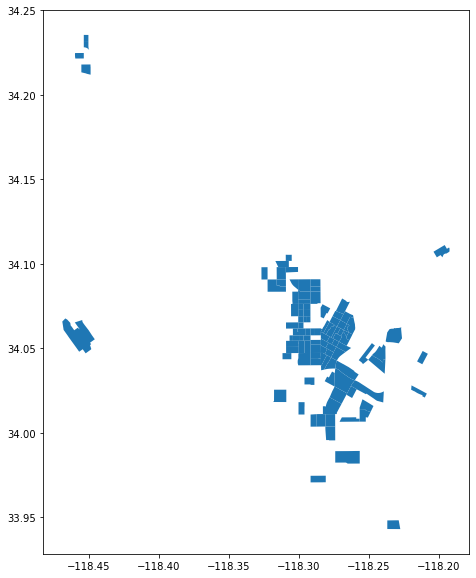

In [26]:
means2work_sorted_pt[means2work_sorted_pt['Percent Public transportation'] > 20].plot(figsize=(12,10))

## Bus

In [27]:
means2work_sorted_bus = means2work.sort_values(by='Percent Bus',ascending = False)

In [28]:
means2work_sorted_bus[['geoid','Percent Bus']].head(10)

,geoid,Percent Bus
569,14000US06037209402,68.048671
560,14000US06037208902,56.562923
562,14000US06037208904,56.362725
536,14000US06037206300,52.588235
563,14000US06037209102,49.682805
564,14000US06037209103,47.663551
599,14000US06037212203,47.074122
570,14000US06037209403,46.161935
548,14000US06037208301,45.732255
557,14000US06037208720,42.293465


Adding a Map

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


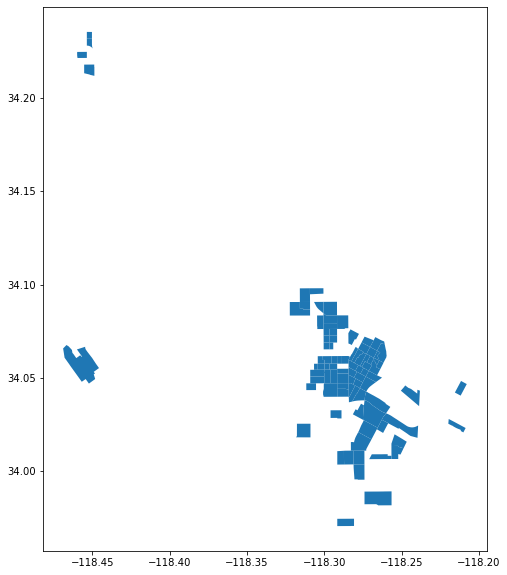

In [29]:
means2work_sorted_bus[means2work_sorted_pt['Percent Bus'] > 20].plot(figsize=(12,10))

## Subway

In [30]:
means2work_sorted_sub = means2work.sort_values(by='Percent Subway or elevated il',ascending = False)

In [31]:
means2work_sorted_sub[['geoid','Percent Subway or elevated il']].head(10)

,geoid,Percent Subway or elevated il
531,14000US06037206020,20.088300
418,14000US06037190402,10.240113
489,14000US06037199300,8.043876
453,14000US06037192620,7.094972
605,14000US06037212410,7.062476
369,14000US06037183610,6.644951
535,14000US06037206200,6.615925
203,14000US06037124902,6.456572
540,14000US06037207301,6.451613
359,14000US06037183103,6.376689


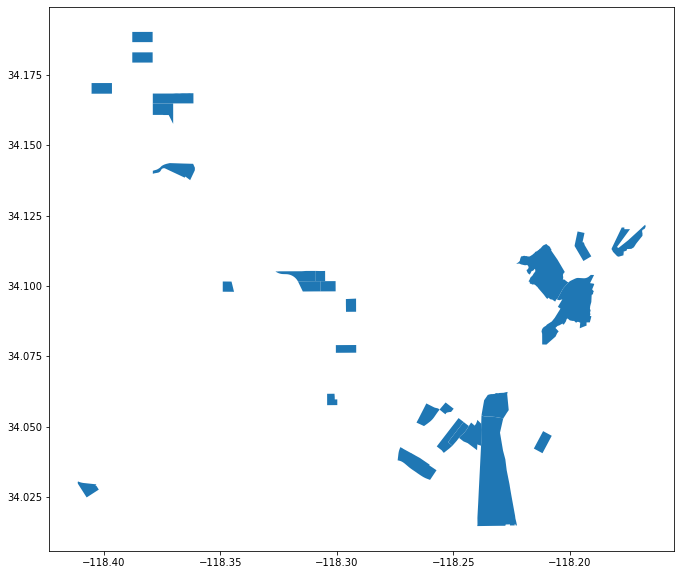

In [32]:
means2work_sorted_sub[means2work_sorted_sub['Percent Subway or elevated il'] > 5].plot(figsize=(12,10))

## Distance Rail

In [33]:
means2work_sorted_commuter = means2work.sort_values(by='Percent Long-distance train or commuter rail',ascending = False)

In [34]:
means2work_sorted_commuter[['geoid','Percent Long-distance train or commuter rail']].head(10)

,geoid,Percent Long-distance train or commuter rail
762,14000US06037236203,9.416725
729,14000US06037231300,4.793171
763,14000US06037236204,4.505170
597,14000US06037212102,3.832117
18,14000US06037104124,3.149100
661,14000US06037219300,3.076923
535,14000US06037206200,2.810304
817,14000US06037242100,2.404526
44,14000US06037106406,2.235846
81,14000US06037111206,2.209705


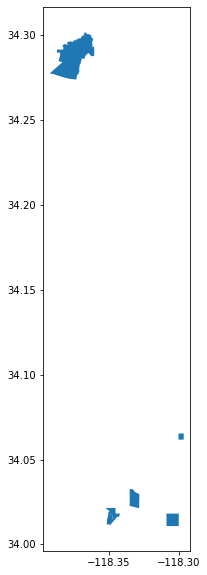

In [35]:
means2work_sorted_commuter[means2work_sorted_commuter['Percent Long-distance train or commuter rail'] > 3].plot(figsize=(12,10))

## Light Rail

In [36]:
means2work_sorted_lr = means2work.sort_values(by='Percent Light rail, streetcar or trolley',ascending = False)

In [37]:
means2work_sorted_lr[['geoid','Percent Light rail, streetcar or trolley']].head(10)

,geoid,"Percent Light rail, streetcar or trolley"
371,14000US06037183701,8.559964
372,14000US06037183702,4.969778
820,14000US06037242600,2.679275
759,14000US06037236000,2.613790
561,14000US06037208903,2.450559
795,14000US06037239801,2.154882
819,14000US06037242300,2.149837
735,14000US06037231800,2.038320
882,14000US06037269906,2.008547
717,14000US06037228710,1.996008


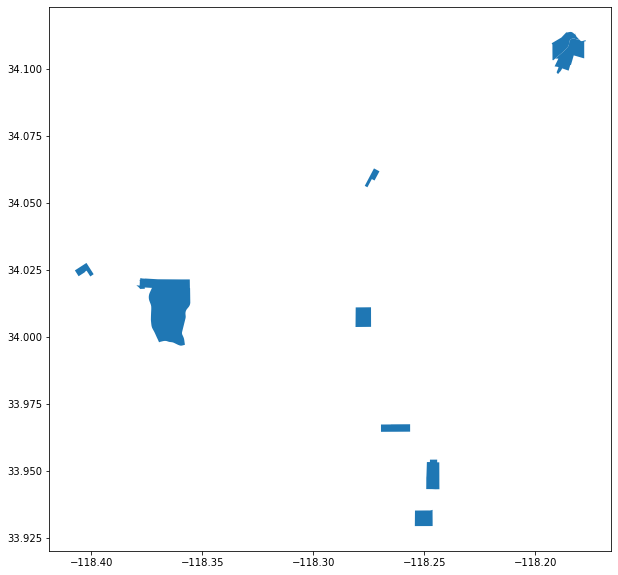

In [38]:
means2work_sorted_lr[means2work_sorted_lr['Percent Light rail, streetcar or trolley'] > 2].plot(figsize=(12,10))

## Mapping

In [39]:
# to provide basemaps 
import contextily as ctx

In [40]:
means2work_web_mercator = means2work.to_crs(epsg=3857)

### Public Transit

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
means2work_web_mercator[means2work_web_mercator['Percent Public transportation'] > 10].plot(ax=ax,color= 'teal',alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 10% Percent Public transportationn',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
means2work_web_mercator[means2work_web_mercator['Percent Bus'] > 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 20% Percent Bus',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
means2work_web_mercator[means2work_web_mercator['Percent Subway or elevated il'] > 7].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 7% Percent Subway or elevated il',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
means2work_web_mercator[means2work_web_mercator['Percent Long-distance train or commuter rail'] > 3.5].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 3% Percent Commuter Rail',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
means2work_web_mercator[means2work_web_mercator['Percent Light rail, streetcar or trolley'] > 2].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 3% Light Rail',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

# Attribute Merge

Importing My previous file with geoids and neigborhoods names and data background check

In [ ]:
df_slim = pd.read_csv('slim.csv')

In [ ]:
type(df_slim)

In [ ]:
df_slim.head(4)

In [ ]:
df_slim['Name_1'].value_counts()

In [ ]:
df_slim.shape

Info is good to go

Starting process of merge, but quick sample of means2work data

In [ ]:
means2work.head(2)

In [ ]:
m2w_nbh=means2work.merge(df_slim, on='geoid')

In [ ]:
m2w_nbh.head()

In [ ]:
type(m2w_nbh)

In [ ]:
m2w_nbh.shape

In [ ]:
m2w_nbh.dtypes

In [ ]:
m2w_nbh.info()

In [ ]:
m2w_nbh.columns.to_list()

Success! I do want to cut a couple columns. 

In [ ]:
col_to_keep = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home',
 'Name_1'
]

In [ ]:
m2w_nbh = m2w_nbh [col_to_keep]

In [ ]:
m2w_nbh.sample(7)

Rename Columns

In [ ]:
#renaming columns
m2w_nbh.columns = ['geoid',
 'name',
 'Total',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home',
 'Neighborhood'
]

In [ ]:
m2w_nbh.sample(2)

I'm going to take a moment here to celebrate. I still need to some more work with this, like see which nieghborhoods are missing values and also create more variables to call data for each neighborhood, THAT BEING SAID, I've been workin on in some form for about 4-5 weeks. I'm very please with this initial result. 

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
m2w_nbh.plot(column='Percent Public transportation', 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Public transportation")

# spatial lag map on the right
means2work.plot(column='Percent Public transportation', 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Public transportation")

This is like Where's Waldo, but I can pretty easily three of my missing tracts on the furtherest north census tract, a tract by UCLA's campus, and a tract (or two) on the southern most tip. Will need to think creatively on how to find an efficent way to grab these.

# Exploring Neighborhoods

Purpose is to query nbhoods, define new variables, find missing tracts

## Lay of the Land: Missing Tracts

In [ ]:
m2w_nbh[m2w_nbh['Percent Public transportation']>20]

Of the 9 I'm missing, 3 of those missing have 20% or higher

In [ ]:
m2w_nbh[m2w_nbh['Percent Bus']>20]

In [ ]:
m2w_nbh[m2w_nbh['Subway or elevated il']>5]

.

In [ ]:
m2w_nbh[m2w_nbh['Long-distance train or commuter rail']>3]

Adding biking and walking, as there may be a correlation to transit friendly areas.

In [ ]:
m2w_nbh[m2w_nbh['Light rail']>4]

In [ ]:
m2w_nbh[m2w_nbh['Bicycle']>20]

In [ ]:
m2w_nbh[m2w_nbh['Walked']>20]

## Digging a little deeper into each higher transit neighborhoods

A little trimming to identify neighborhoods

### Public Transit

In [ ]:
nbh_pt20 = m2w_nbh[m2w_nbh['Percent Public transportation']>20]

In [ ]:
nbh_pt20.tail()

In [ ]:
nbh_pt20['Neighborhood'].value_counts()

In [ ]:
nbh_pt20.plot(figsize=(12,10),
                 column='Percent Public transportation',
                 legend=True, 
                 scheme='quantiles')

### Bus

In [ ]:
nbh_bus20 = m2w_nbh[m2w_nbh['Percent Bus']>20]

In [ ]:
nbh_bus20.sample(5)

In [ ]:
nbh_bus20['Neighborhood'].value_counts()

### Subway

In [ ]:
nbh_sub5 = m2w_nbh[m2w_nbh['Percent Subway or elevated il']>5]

In [ ]:
nbh_sub5

In [ ]:
nbh_sub5['Neighborhood'].value_counts()

### Commuter

In [ ]:
nbh_commute3 = m2w_nbh[m2w_nbh['Percent Long-distance train or commuter rail']>3]

In [ ]:
nbh_commute3

In [ ]:
nbh_commute3['Neighborhood'].value_counts()

### Light Rail

In [ ]:
nbh_lr4 = m2w_nbh[m2w_nbh['Percent Light rail']>4]

In [ ]:
nbh_lr4

### Scoping Out One Neighborhood

In [ ]:
jefferson_park=m2w_nbh.query("Neighborhood == 'Jefferson Park'")

In [ ]:
jefferson_park

In [ ]:
jefferson_park.plot(
            figsize=(20,12),
            column = 'Percent Public transportation',  
            legend = True,) 